# JSON Data Wrangling Exercise 

In [10]:
# Import the necessary libraries

import json
from pandas.io.json import json_normalize
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Import the data as a dataframe


data_location = 'C:\\Users\\sawal\\mystuff\\data_wrangling_json\\data'
assert os.path.isdir(data_location), 'invalid path'
os.chdir(data_location)

with open("world_bank_projects.json", 'r') as file:
    wb_df = pd.read_json(file)

# Perform quick data check 

print(wb_df.head())

                                    _id  approvalfy board_approval_month  \
0  {'$oid': '52b213b38594d8a2be17c780'}        1999             November   
1  {'$oid': '52b213b38594d8a2be17c781'}        2015             November   
2  {'$oid': '52b213b38594d8a2be17c782'}        2014             November   
3  {'$oid': '52b213b38594d8a2be17c783'}        2014              October   
4  {'$oid': '52b213b38594d8a2be17c784'}        2014              October   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   
2  2013-11-01T00:00:00Z   MINISTRY OF FINANCE AND ECONOMIC DEVEL   
3  2013-10-31T00:00:00Z   MIN. OF PLANNING AND INT'L COOPERATION   
4  2013-10-31T00:00:00Z                      MINISTRY OF FINANCE   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Republic of Ethio

In [12]:
print(wb_df.tail())

                                      _id  approvalfy board_approval_month  \
495  {'$oid': '52b213b38594d8a2be17c96f'}        2013               August   
496  {'$oid': '52b213b38594d8a2be17c970'}        2013               August   
497  {'$oid': '52b213b38594d8a2be17c971'}        2013               August   
498  {'$oid': '52b213b38594d8a2be17c972'}        2013               August   
499  {'$oid': '52b213b38594d8a2be17c973'}        2013               August   

        boardapprovaldate                              borrower  \
495  2012-08-10T00:00:00Z           THE COMPETITIVENESS COMPANY   
496  2012-08-09T00:00:00Z       LAO PEOPLES DEMOCRATIC REPUBLIC   
497  2012-08-03T00:00:00Z  GOVERNMENT OF THE REPUBLIC OF GUINEA   
498  2012-08-02T00:00:00Z                 REPUBLIC OF INDONESIA   
499  2012-08-02T00:00:00Z                    GOVERMENT OF KENYA   

              closingdate                       country_namecode countrycode  \
495  2013-08-31T00:00:00Z                       

In [13]:
# There are various data types, including nested objects

print(wb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# Task 1: Find the 10 countries with the most projects

In [14]:
# Inspect the columns to find relevent country column

for idx, col in enumerate(wb_df.columns):
    print(idx, col)

0 _id
1 approvalfy
2 board_approval_month
3 boardapprovaldate
4 borrower
5 closingdate
6 country_namecode
7 countrycode
8 countryname
9 countryshortname
10 docty
11 envassesmentcategorycode
12 grantamt
13 ibrdcommamt
14 id
15 idacommamt
16 impagency
17 lendinginstr
18 lendinginstrtype
19 lendprojectcost
20 majorsector_percent
21 mjsector_namecode
22 mjtheme
23 mjtheme_namecode
24 mjthemecode
25 prodline
26 prodlinetext
27 productlinetype
28 project_abstract
29 project_name
30 projectdocs
31 projectfinancialtype
32 projectstatusdisplay
33 regionname
34 sector
35 sector1
36 sector2
37 sector3
38 sector4
39 sector_namecode
40 sectorcode
41 source
42 status
43 supplementprojectflg
44 theme1
45 theme_namecode
46 themecode
47 totalamt
48 totalcommamt
49 url


In [15]:
# Check which column will yield the 'cleanest' version of country by viewing the first 5 records of the relevent columns

print(wb_df.iloc[:5, 6:10])


                               country_namecode countrycode  \
0  Federal Democratic Republic of Ethiopia!$!ET          ET   
1                      Republic of Tunisia!$!TN          TN   
2                                   Tuvalu!$!TV          TV   
3                        Republic of Yemen!$!RY          RY   
4                       Kingdom of Lesotho!$!LS          LS   

                               countryname    countryshortname  
0  Federal Democratic Republic of Ethiopia            Ethiopia  
1                      Republic of Tunisia             Tunisia  
2                                   Tuvalu              Tuvalu  
3                        Republic of Yemen  Yemen, Republic of  
4                       Kingdom of Lesotho             Lesotho  


In [16]:
# Using the 'countryshortname' column, utilize the value_counts method and assign the top ten to a variable

top_pj_by_country = wb_df['countryshortname'].value_counts()[:10]

# Print out the variable
print(top_pj_by_country)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64


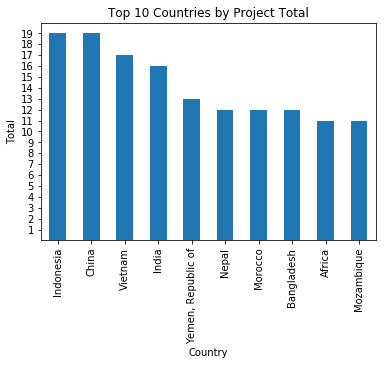

In [17]:
# Create a Bar Chart to visualize the top ten countries with the most projects

top_pj_by_country.plot(kind = 'bar')
plt.xlabel('Country')
plt.title('Top 10 Countries by Project Total')
plt.yticks(np.arange(1, max(top_pj_by_country) + 1, 1))
plt.ylabel('Total')
plt.show()

# Task 2 - Find the top 10 major project themes

In [18]:

# Inspect the first 5 rows of projects column

print(wb_df['mjtheme_namecode'][:5])


0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object


In [19]:
# Each observation of this variable contains a nested object and will not be able to be analyzed in its current form

# Load original json file as text

with open('world_bank_projects.json', 'r') as file:
    wb_json = json.load(file)


In [20]:
# Normalize this object and create separate dataframe

theme_normalized = json_normalize(wb_json, 'mjtheme_namecode')

# Use value counts method for the top ten projects by name

top_mjr_pj_themes = theme_normalized['name'].value_counts()[:10]

# Print the top 10 projects

print(top_mjr_pj_themes)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64


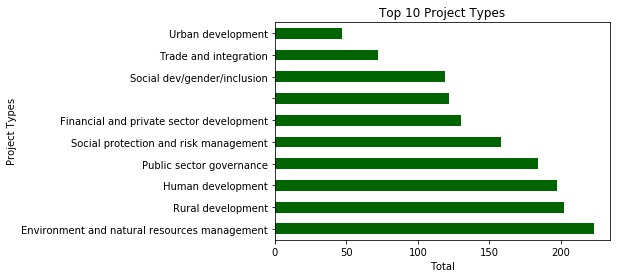

In [21]:
# Create a horizontal bar plot

top_mjr_pj_themes.plot(kind = 'barh', color = 'darkgreen', ecolor = 'black')
plt.ylabel('Project Types')
plt.xlabel('Total')
plt.title('Top 10 Project Types')
plt.show()

# Task 3: Create a dataframe with the missing values filled in 

In [22]:
# Look into missing values by viewing the two columns as unique and determine if we can use the other column to fill in
# missing data

print(theme_normalized.drop_duplicates())

    code                                          name
0      8                             Human development
1     11                                              
2      1                           Economic management
3      6         Social protection and risk management
4      5                         Trade and integration
5      2                      Public sector governance
6     11  Environment and natural resources management
8      7                   Social dev/gender/inclusion
11     4      Financial and private sector development
13     6                                              
17     8                                              
18    10                             Rural development
19     7                                              
24     2                                              
29     4                                              
53     9                             Urban development
121   10                                              
201    5  

In [23]:
# The missing names can be mapped to the code column.


# Fill in the missing values with NaN 
theme_normalized = theme_normalized.replace('', np.nan)

# Create a temporary dataframe which contains the unique code and names without
map_df = theme_normalized.dropna().drop_duplicates(subset = ['code', 'name'])

# Create a dictionary of keys and values for mapping the missing name values with the code
map_val = dict(zip(map_df.code, map_df.name))


# Map the values to a new column, 'name_fixed' , which will have the missing values filled in
theme_normalized['name_fixed'] =  theme_normalized['code'].map(map_val)

In [24]:
# Check that the non-missing values match in the 'names_fixed' and 'names' column

# Sort by 'name'
theme_normalized = theme_normalized.sort_values('name')

# Determine the column numbers to check against
na_number = len(theme_normalized) - theme_normalized['name'].isnull().sum()


# Create a boolean for each value
check = theme_normalized['name'][:na_number] == theme_normalized['name_fixed'][:na_number]

# Check boolean to see if there are any discrepancies
for i in check:
    if i == False:
        print('error')
    else:
        continue
        
# No errors

# Task 2 Revisited: Top 10 major project themes with complete data

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name_fixed, dtype: int64


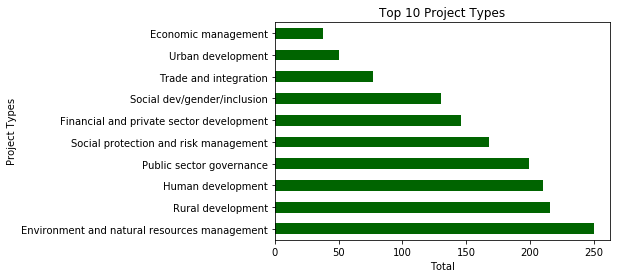

In [25]:

# Now that the missing values have been filled, create a new list of the top projects

top_mjr_pj_themes_2 = theme_normalized['name_fixed'].value_counts()[:10]

# Print the top 10 projects
print(top_mjr_pj_themes_2)

# Create a horizontal bar plot

top_mjr_pj_themes_2.plot(kind = 'barh', color = 'darkgreen', ecolor = 'black')
plt.ylabel('Project Types')
plt.xlabel('Total')
plt.title('Top 10 Project Types')
plt.show()